In [24]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_boston

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#To plot the graph embedded in the notebook
%matplotlib inline

##model imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
boston = load_boston()

# df = pd.DataFrame(boston)
print(boston.data.shape)
print(boston.target.shape)
# x_train,x_test,y_train
print("helo")

(506, 13)
(506,)
helo


# Saving the Data into a pandas dataframe

In [15]:
df  = pd.DataFrame(boston.data,columns=boston.feature_names)
df['PRICE'] = boston.target
#describe our data
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

# Data preprocessing to see any missing values

In [18]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


# Data visualization

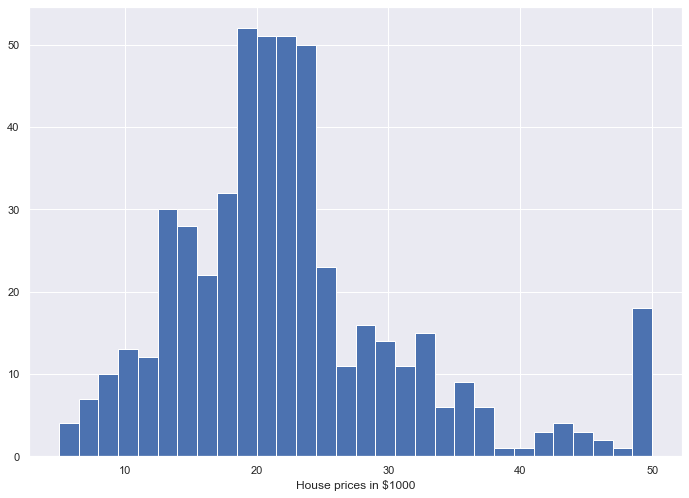

In [19]:
#histogram 
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(df['PRICE'], bins=30)
plt.xlabel("House prices in $1000")
plt.show()

<AxesSubplot:>

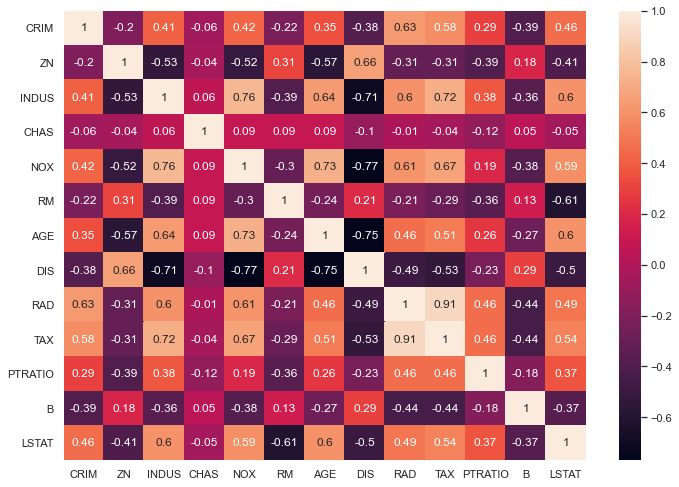

In [20]:
#creating a correlation matrix
## Creating a df without PRICE column, as we need to see the correlation between it and other columns.
bos_1 = pd.DataFrame(boston.data, columns = boston.feature_names)

correlation_matrix = bos_1.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
#the corelation eff ranges from -1 to 1, the closer it is to 1 means a positive corr and vice versa

# Scatter plot visualisation.

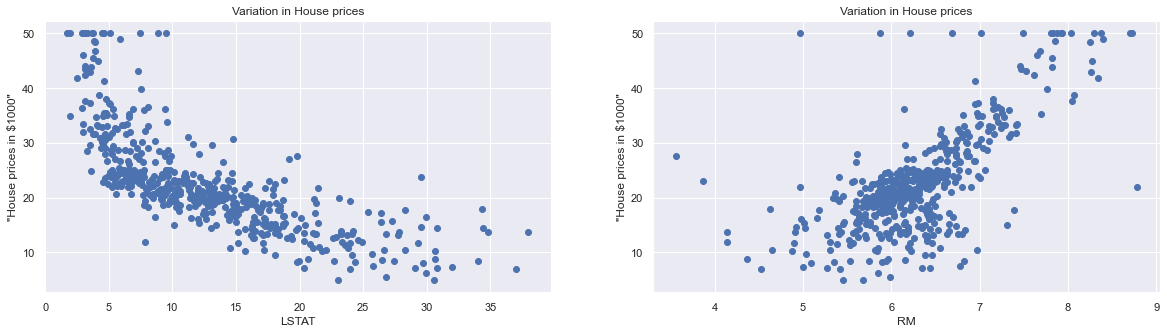

In [23]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

# Model for all variables

In [46]:
##spliting the data into training and testing dataset 
x = df.drop('PRICE',axis=1)
y = df['PRICE']
y = np.array(y).reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)
all_model = LinearRegression()
##fit the model
all_model.fit(x_train,y_train)
prediction = all_model.predict(x_test)

# print(y_test[10])
prediction[1]
##checking the accuracy of our score
ms = mean_squared_error(y_test,prediction)
print()
print('jd',ms)
rmse = np.sqrt(ms)
print(rmse)


jd 30.697037704088583
5.540490745781332
